In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt

/kaggle/input/2018-w51-london-bus-safety-performancee/TFL Bus Safety.csv


# Analyzing the Injury Result Distribution Versus Sex of Victim Recorded
This analysis first involved grouping the data by sex and injury result description, then applying the count function to see how many incidents there were for each sex category (Male, Female and Unknown for victims whose sex was not recorded). I had some issues decoupling the GroupBy categories from the index, so did some wrangling by unstacking to get shift the index to one level, that of the Victims' Sex, then reset the index to incorporate the Victims' Sex as a column for the dataframe rather than an index. Melting the table then allowed me to have more structured data with each value constrained to a row cell and variables constrained as column names. This allowed for easier plotting with the Seaborn module.

   Year Date Of Incident Route        Operator  Group Name  \
0  2015       2015-01-01     1  London General    Go-Ahead   
1  2015       2015-01-01     4       Metroline   Metroline   
2  2015       2015-01-01     5     East London  Stagecoach   
3  2015       2015-01-01     5     East London  Stagecoach   
4  2015       2015-01-01     6       Metroline   Metroline   

             Bus Garage              Borough  \
0  Garage Not Available            Southwark   
1  Garage Not Available            Islington   
2  Garage Not Available             Havering   
3  Garage Not Available  None London Borough   
4  Garage Not Available          Westminster   

                           Injury Result Description Incident Event Type  \
0                          Injuries treated on scene    Onboard Injuries   
1                          Injuries treated on scene    Onboard Injuries   
2  Taken to Hospital – Reported Serious Injury or...    Onboard Injuries   
3  Taken to Hospital – Reported Se

Injury Result Description,Fatal,Injuries treated on scene,Reported Minor Injury - Treated at Hospital,Taken to Hospital – Reported Serious Injury or Severity Unknown
Victims Sex,,,,
Female,10.0,8816.0,1460.0,1561.0
Male,32.0,5632.0,1006.0,1039.0
Unknown,NaN,2888.0,320.0,394.0


Injury Result Description,Victims Sex,Fatal,Injuries treated on scene,Reported Minor Injury - Treated at Hospital,Taken to Hospital – Reported Serious Injury or Severity Unknown
id,,,,,
0,Female,10.0,8816.0,1460.0,1561.0
1,Male,32.0,5632.0,1006.0,1039.0
2,Unknown,NaN,2888.0,320.0,394.0


,Victims Sex,Injury Result Description,value
0,Female,Fatal,10.0
1,Male,Fatal,32.0
2,Unknown,Fatal,NaN
3,Female,Injuries treated on scene,8816.0
4,Male,Injuries treated on scene,5632.0
5,Unknown,Injuries treated on scene,2888.0
6,Female,Reported Minor Injury - Treated at Hospital,1460.0
7,Male,Reported Minor Injury - Treated at Hospital,1006.0
8,Unknown,Reported Minor Injury - Treated at Hospital,320.0
9,Female,Taken to Hospital – Reported Serious Injury or...,1561.0


<AxesSubplot:title={'center':'Injuries Counts by Gender'}, xlabel='Injury Result Description', ylabel='value'>

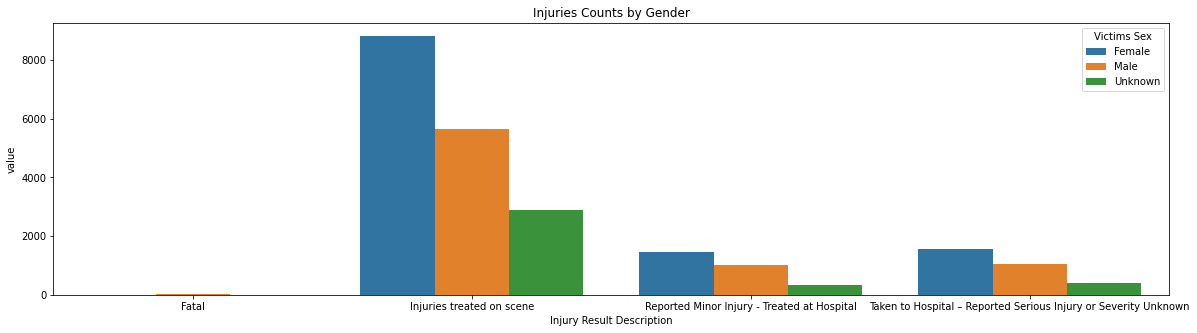

In [2]:
#injury types vs. sex
data = pd.read_csv('/kaggle/input/2018-w51-london-bus-safety-performancee/TFL Bus Safety.csv')
print(data.head())

grouped = data.groupby(['Victims Sex','Injury Result Description'])['Injury Result Description'].count()
grouped2 = grouped.unstack()
display(grouped2)
grouped3 = grouped2.reset_index()
grouped3.index.names = ['id']
display(grouped3)
grouped4 = pd.melt(grouped3,['Victims Sex'])
display(grouped4)
fig = plt.figure(figsize=[20,5])
plt.title('Injuries Counts by Gender')
sns.barplot(x='Injury Result Description',y='value',hue='Victims Sex',data=grouped4)

# GroupBy to Obtain the Top Ten Routes with Injuries
This analysis was much more concise, simply using a GroupBy and resetting the index to get columns that were callable by Matplotlib.

  Route  value
0   OOS    321
1    18    191
2    55    177
3    24    165
4    73    156
5    96    155
6   149    154
7   207    153
8    25    143
9    65    136


[]

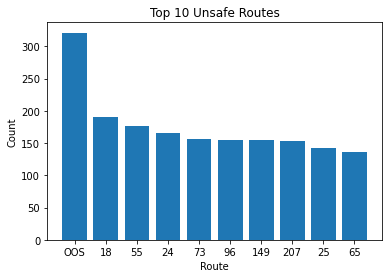

In [3]:
#most unsafe routes
routes = data['Route'].groupby(data['Route']).count().sort_values(ascending=False)[:10]
routes2 = routes.reset_index(name='value')
print(routes2)
plt.clf()
plt.bar(routes2['Route'], routes2['value'])
plt.title('Top 10 Unsafe Routes')
plt.xlabel('Route')
plt.ylabel('Count')
plt.plot()

# Incidents Categorized by Day of Week
I created a new column which parsed the date into a specific day of the week, then grouped and counted the injuries that occured on that day, then plotted them on a bar chart. Sunday has the most occurences.

<class 'pandas.core.series.Series'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.series.Series'>
         Day  Count
0     Monday   2618
1   Saturday   2701
2    Tuesday   3223
3   Thursday   3480
4     Friday   3571
5  Wednesday   3629
6     Sunday   3936


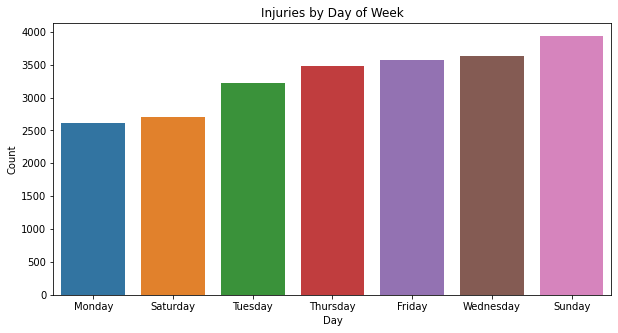

In [4]:
#Which times have the most injuries?
import seaborn as sns
print(type(data['Date Of Incident']))
print(type(pd.to_datetime(data['Date Of Incident'][0])))
data['Date Of Incident'] = pd.to_datetime(data['Date Of Incident'])
data['Day'] = data['Date Of Incident'].dt.day_name()
print(type(data['Date Of Incident']))
dayofweek = data['Day'].groupby(data['Day']).count().sort_values()
dayofweek = dayofweek.reset_index(name='Count')
print(dayofweek)
fig = plt.figure(figsize=[10,5])
plt.title('Injuries by Day of Week')
sns.barplot(x='Day', y='Count', data=dayofweek)
plt.show()

# Incidents Categorized by Day of Week and Further Drilled Down
To determine whether the distribution of injuries was different for each day of the week, a further GroupBy was performed. This showed that the distribution of incident types was very similar for each day of the week.

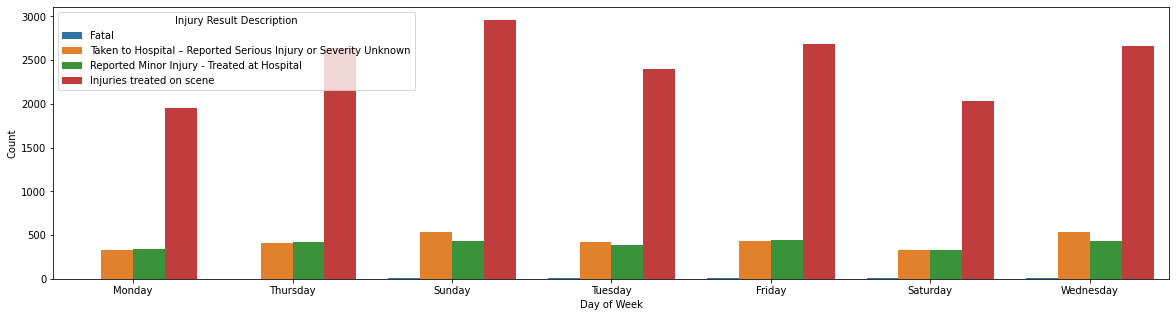

In [5]:
#types of injuries per day of week
injurybyday = data.groupby([data['Injury Result Description'],data['Day']],as_index=False).count().sort_values(by='Year')
xdata = 'Injury Result Description'
ydata = 'Year'
fig = plt.figure(figsize=[20,5])
ax = sns.barplot(x='Day',y=ydata,hue='Injury Result Description',data=injurybyday)
ax.set(xlabel='Day of Week', ylabel='Count')
plt.show()

# General Split-Apply Function
A split-apply function was defined to extract the top four operators that had the most incidents after a GroupBy operation. This is applied to a GroupBy dataframe which has a heirarchical index and therefore needs some sort of function to rank its groups.

In [6]:
#top4 func
def top_counts(df, n=4):
    operator_names = pd.Index([i for i,j,k in df.index]).unique()
    operators = []
    for name in operator_names:
            value = df.loc[name].sum()
            operators.append((name,value))
    top4 = sorted(operators, key= lambda x: x[1])[-n:]
    top4names = [i for i,j in top4]
    return df.loc[top4names]

Below, the function is applied, then a further dataframe is created to obtain the overall count of incident regardless of type, per year, per operator from the top four group.

In [7]:
#safety improvement/change year-over-year per operator (use pivot table and produce a line graph as an end result)
#5 operators with the most counts
operators = data.groupby(['Operator','Injury Result Description','Year']).count()
top4 = operators.apply(top_counts)
display(top4.head())
overall_year = top4.groupby(['Operator','Year']).sum().reset_index()
display(overall_year.head())

Date Of Incident  Route  \
Operator      Injury Result Description Year                            
London United Fatal                     2015                 2      2   
                                        2016                 1      1   
                                        2017                 3      3   
              Injuries treated on scene 2015               560    560   
                                        2016               411    411   

                                              Group Name  Bus Garage  Borough  \
Operator      Injury Result Description Year                                    
London United Fatal                     2015           2           2        2   
                                        2016           1           1        1   
                                        2017           3           3        3   
              Injuries treated on scene 2015         560         560      560   
                                        2016         411         411      411   

                                              Incident Event Type  \
Operator      Injury Result Description Year                        
London United Fatal                     2015                    2   
                                        2016                    1   
                                        2017                    3   
              Injuries treated on scene 2015                  560   
                                        2016                  411   

                                              Victim Category  Victims Sex  \
Operator      Injury Result Description Year                                 
London United Fatal                     2015                2            2   
                                        2016                1            1   
                                        2017                3            3   
              Injuries treated on scene 2015              560          560   
                                        2016              411          411   

                                              Victims Age  Day  
Operator      Injury Result Description Year                    
London United Fatal                     2015            2    2  
                                        2016            1    1  
                                        2017            3    3  
              Injuries treated on scene 2015          560  560  
                                        2016          411  411

,Operator,Year,Date Of Incident,Route,Group Name,Bus Garage,Borough,Incident Event Type,Victim Category,Victims Sex,Victims Age,Day
0,Arriva London North,2015,789,789,789,789,789,789,789,789,789,789
1,Arriva London North,2016,656,656,656,656,656,656,656,656,656,656
2,Arriva London North,2017,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026
3,Arriva London North,2018,737,737,737,737,737,737,737,737,737,737
4,East London,2015,681,681,681,681,681,681,681,681,681,681


# Line Graph of Overall Incident Counts Per Year, Per Operator
A for loop was applied to create four line charts on the same plot.

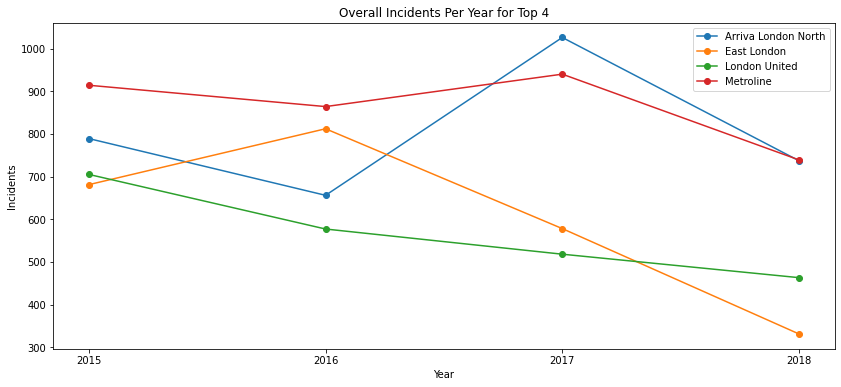

In [8]:
#Overall Incidents Line Graph
fig = plt.figure(figsize=[14,6])
ax = plt.subplot()
legend = []
for name in overall_year['Operator'].unique():
    x = overall_year['Year'][overall_year['Operator'] == name]
    y = overall_year['Route'][overall_year['Operator'] == name]
    plt.plot(x,y, marker='o')
    legend.append(name)
plt.legend(legend)
ax.set_xticks([2015,2016,2017,2018])
plt.xlabel('Year')
plt.ylabel('Incidents')
plt.title('Overall Incidents Per Year for Top 4')
plt.show()

# Line Graphs Per Year, Per Operator Seperated by Incident Type
Nested for loops, with values called by list indices based on the lists of unique operator names and incident categories, were used to plot subplots based on incident type. Because subplot indices were in an array format limited to co-ordinates of a 2X2 matrix, while the list indices were based on the range of values in each category list (operator names, Injury Result descriptions), a dummy variable represented by the letter Z, was used to signal when to plot to the next subplot. 

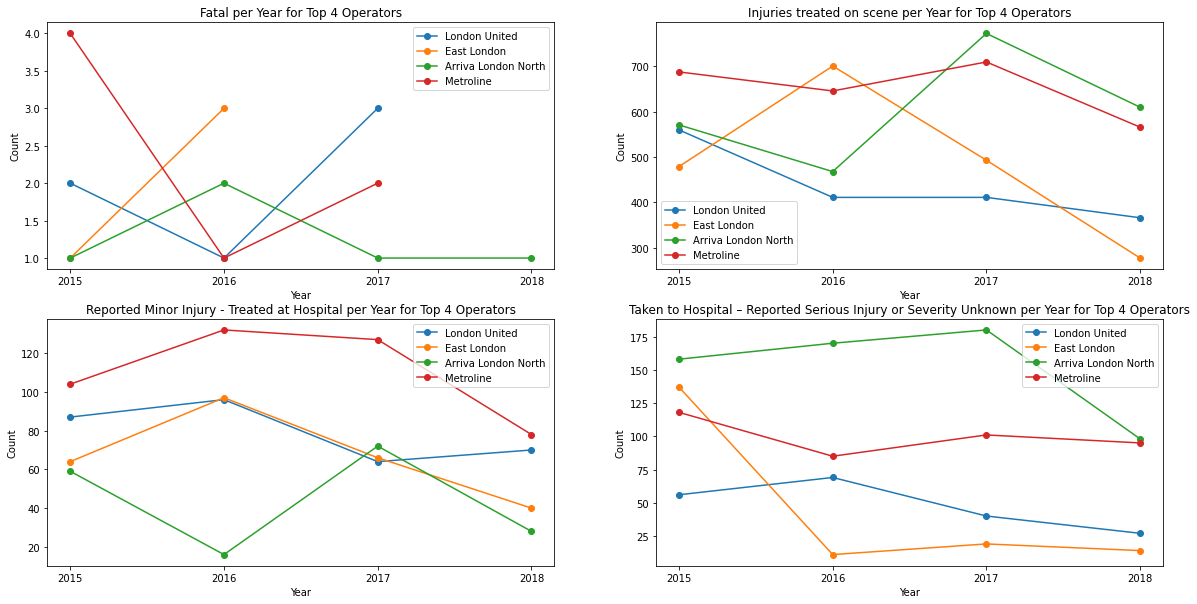

In [9]:
#individual line graphs for each incident type (top4 dataframe) with top4 operators as a legend
top4_2 = top4.reset_index()
fig, axes = plt.subplots(2,2, figsize=[20,10])
cat1 = 'Injury Result Description'
cat2 = 'Operator'
inj_labels = top4_2[cat1].unique()
op_labels = top4_2[cat2].unique()

z = 0
for i in range(2):
    for j in range(2):
        z += 1
        for k in range(len(op_labels)):
            x = top4_2['Year'][(top4_2[cat2] == op_labels[k]) & (top4_2[cat1] == inj_labels[z-1])]
            y = top4_2['Route'][(top4_2[cat2] == op_labels[k]) & (top4_2[cat1] == inj_labels[z-1])]
            axes[i,j].plot(x,y, label=op_labels[k], marker='o')
        axes[i,j].set_title('{} per Year for Top 4 Operators'.format(inj_labels[z-1]))
        axes[i,j].legend()
        axes[i,j].set_xticks([2015,2016,2017,2018])
        props = {'xlabel':'Year', 'ylabel':'Count'}
        axes[i,j].set(**props)

# Calculating Year-Over-Year Percentage Changes in Incident Occurences for Overall Incidents per Operator
The pct_change() Pandas method and a lambda function were used to obtain a percentage change from the previous year. It was important to use the overall_year dataframe grouped by operator to divide when to begin and end the percentage change calculation chain, otherwise percentage changes would be calculated for a certain operator from another operator's final year incident counts by virtue of being adjacent in the row below. The 'Route' column is used as its rows are simply counts just as any other column rows are in the count function. In this case, the counted rows for 'Route' or any other column that is not being used to group the rows, represent how many incidents/injuries occured for that particular operator, for which percentage changes are obtained.

In [10]:
#percent change table - try to obtain percent changes based on overall 
    
overall_year['pct_change'] = overall_year.groupby(['Operator']).pct_change()['Route'].apply(lambda x: x*100)
pct_change_inj = top4.groupby(['Operator', 'Injury Result Description']).pct_change().apply(lambda x: (x*100)).reset_index()
display(overall_year.head())
display(pct_change_inj.head(10))

,Operator,Year,Date Of Incident,Route,Group Name,Bus Garage,Borough,Incident Event Type,Victim Category,Victims Sex,Victims Age,Day,pct_change
0,Arriva London North,2015,789,789,789,789,789,789,789,789,789,789,NaN
1,Arriva London North,2016,656,656,656,656,656,656,656,656,656,656,-16.856781
2,Arriva London North,2017,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026,56.402439
3,Arriva London North,2018,737,737,737,737,737,737,737,737,737,737,-28.167641
4,East London,2015,681,681,681,681,681,681,681,681,681,681,NaN


,Operator,Injury Result Description,Year,Date Of Incident,Route,Group Name,Bus Garage,Borough,Incident Event Type,Victim Category,Victims Sex,Victims Age,Day
0,London United,Fatal,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,London United,Fatal,2016,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000,-50.000000
2,London United,Fatal,2017,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
3,London United,Injuries treated on scene,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,London United,Injuries treated on scene,2016,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143,-26.607143
5,London United,Injuries treated on scene,2017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,London United,Injuries treated on scene,2018,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905,-10.948905
7,London United,Reported Minor Injury - Treated at Hospital,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,London United,Reported Minor Injury - Treated at Hospital,2016,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828,10.344828
9,London United,Reported Minor Injury - Treated at Hospital,2017,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333,-33.333333


Similar to the Overall Incident Counts line graph, is the line graph below for the Overall Incidents Per Year for the Top 4 as percentage differences from the previous year, starting with 2015. 2015 is not shown on the graph as it is the baseline year for which the the following values are being compared to.

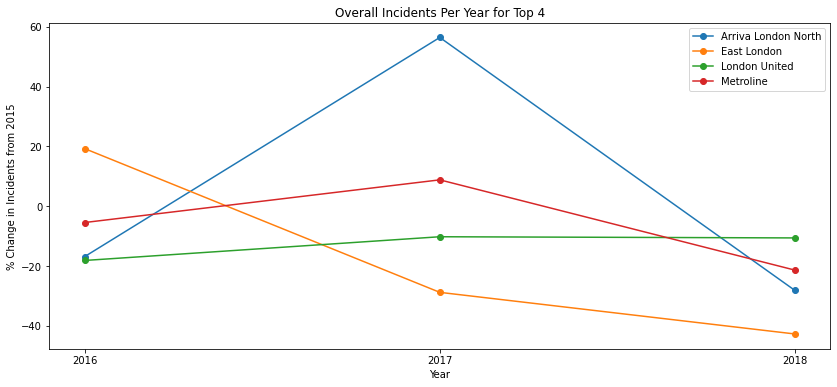

In [11]:
#overall percent changes line graph
fig = plt.figure(figsize=[14,6])
ax = plt.subplot()
legend = []
for name in overall_year['Operator'].unique():
    x = overall_year['Year'][overall_year['Operator'] == name]
    y = overall_year['pct_change'][overall_year['Operator'] == name]
    plt.plot(x,y, marker='o')
    legend.append(name)
plt.legend(legend)
ax.set_xticks([2016,2017,2018])
plt.xlabel('Year')
plt.ylabel('% Change in Incidents from 2015')
plt.title('Overall Incidents Per Year for Top 4')
plt.show()

The same analysis is done for subplots seperated by incident types or categories of 'Injury Result Description'.

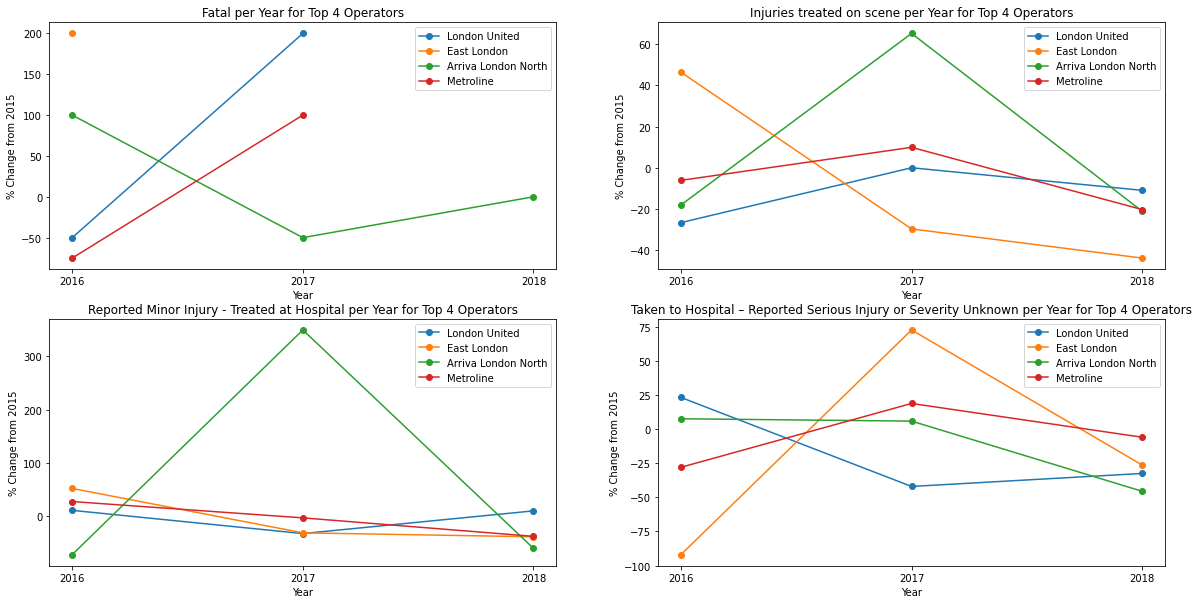

In [12]:
#Individual percent changes based on Injury Result Description

fig, axes = plt.subplots(2,2, figsize=[20,10])
cat1 = 'Injury Result Description'
cat2 = 'Operator'
inj_labels = pct_change_inj[cat1].unique()
op_labels = pct_change_inj[cat2].unique()

z = 0
for i in range(2):
    for j in range(2):
        z += 1
        for k in range(len(op_labels)):
            x = pct_change_inj['Year'][(pct_change_inj[cat2] == op_labels[k]) & (pct_change_inj[cat1] == inj_labels[z-1])]
            y = pct_change_inj['Route'][(pct_change_inj[cat2] == op_labels[k]) & (pct_change_inj[cat1] == inj_labels[z-1])]
            axes[i,j].plot(x,y, label=op_labels[k], marker='o')
        axes[i,j].set_title('{} per Year for Top 4 Operators'.format(inj_labels[z-1]))
        axes[i,j].legend()
        axes[i,j].set_xticks([2016,2017,2018])
        props = {'xlabel':'Year', 'ylabel':'% Change from 2015'}
        axes[i,j].set(**props)

This concludes my analysis. Thank you for reading!